# Combine all the different data tables

In [122]:
import pandas as pd
import numpy as np
import os

import matplotlib.pyplot as plt

In [123]:
# Directory where your .pkl files are stored
base_path = "../result_tables"

list_of_tables = []
for table_name in os.listdir(base_path):
    if table_name.endswith(".pkl"):
        list_of_tables.append(table_name)

for table_name in os.listdir(os.path.join(base_path, "WDMS")):
    if table_name.endswith(".pkl"):
        list_of_tables.append('WDMS/'+table_name)


print("List of tables:", list_of_tables)

List of tables: ['algols.pkl', 'WRs_SMC.pkl', 'ns_table.pkl', 'Be_sdOB_table.pkl', 'bh_table.pkl', 'WDMS/Escorza2019.pkl', 'WDMS/RebassaMansergas2012.pkl', 'WDMS/WD_Binary_Pathways_VI.pkl', 'WDMS/Jorissen2019.pkl', 'WDMS/Shahaf2024.pkl', 'WDMS/Zorotovic2010.pkl', 'WDMS/WD_Binary_Pathways_X.pkl']


In [124]:
# List of table names (without .pkl extension)
loaded_tables = {}

base_path = "../result_tables"  # Adjust if needed

columns = [
    "System Name", "RA", "Dec", "Period", "Eccentricity",
    "M1","M1_sin3i", "M2", "M2_sin3i", "q", "Mass Function",
    "Type1", "Type2", "Detection Method", "Reference", "Notes"
]


# COMBINE ALL TABLES INTO A SINGLE DATAFRAME
Post_MT_table = pd.DataFrame(columns=columns)


for name in list_of_tables:
    pkl_path = os.path.join(base_path, f"{name}")
    try:
        table = pd.read_pickle(pkl_path)
        loaded_tables[name] = table
        print(f"Loaded table: {name}")
        Post_MT_table = pd.concat([Post_MT_table, table], ignore_index=True)
    except Exception as e:
        print(f"Could not load {name}: {e}")


Loaded table: algols.pkl
Loaded table: WRs_SMC.pkl
Loaded table: ns_table.pkl
Loaded table: Be_sdOB_table.pkl
Loaded table: bh_table.pkl
Loaded table: WDMS/Escorza2019.pkl
Loaded table: WDMS/RebassaMansergas2012.pkl
Loaded table: WDMS/WD_Binary_Pathways_VI.pkl
Loaded table: WDMS/Jorissen2019.pkl
Loaded table: WDMS/Shahaf2024.pkl
Loaded table: WDMS/Zorotovic2010.pkl
Loaded table: WDMS/WD_Binary_Pathways_X.pkl


In [125]:
display(Post_MT_table)

,System Name,RA,Dec,Period,Eccentricity,M1,M1_sin3i,M2,M2_sin3i,q,Mass Function,Type1,Type2,Detection Method,Reference,Notes,m1_sin3i,m2_sin3i
0,VFTS 061,"[7e-06, 84.378106, 7e-06]","[7e-06, -69.088187, 7e-06]","[7e-06, 2.33344, 7e-06]","[nan, 0.0, nan]","[1.4, 16.3, 1.4]","[nan, nan, nan]","[0.6, 8.7, 0.6]","[nan, nan, nan]","[0.059, 0.534, 0.059]","[nan, nan, nan]",O9.7: V:,ON8.5 III:,"[RV, SB]","[2020A&A...634A.118M, 2020A&A...634A.119M]",LMC,NaN,NaN
1,VFTS 652,"[4e-06, 84.71268, 4e-06]","[5e-06, -69.105694, 5e-06]","[0.00015, 8.58909, 0.00015]","[nan, 0.0, nan]","[3.9, 18.1, 3.9]","[nan, nan, nan]","[1.1, 6.5, 1.1]","[nan, nan, nan]","[0.098, 0.359, 0.098]","[nan, nan, nan]",O9 III:,B2 Ip,"[RV, SB]","[2020A&A...634A.118M, 2020A&A...634A.119M]",LMC,NaN,NaN
2,VFTS 538,"[0.02, 84.68, 0.02]","[0.05, -69.07, 0.05]","[2.3e-05, 4.159758, 2.3e-05]","[nan, 0.0, nan]","[1.9, 18.3, 1.9]","[nan, nan, nan]","[1.4, 11.8, 1.4]","[nan, nan, nan]","[0.1, 0.64, 0.1]","[nan, nan, nan]",ON9 Ia,O7.5: I:(f),"[RV, SB]","[2020A&A...634A.118M, 2020A&A...634A.119M]",LMC,NaN,NaN
3,HV 2543,"[7e-06, 81.864134, 7e-06]","[8e-06, -67.198473, 8e-06]","[4e-06, 4.829046, 4e-06]","[nan, nan, nan]","[0.7, 25.6, 0.7]","[nan, nan, nan]","[1.0, 15.6, 1.0]","[nan, nan, nan]","[0.042, 0.609, 0.042]","[nan, nan, nan]",O8V:,O9III,[EB],"[2000A&A...356..935O, 2022A&A...659A..98S]",LMC,NaN,NaN
4,VFTS 450,"[7e-06, 84.660329, 7e-06]","[7e-06, -69.106116, 8e-06]","[2.7e-05, 6.892336, 2.7e-05]","[nan, 0.0, nan]","[4.1, 29.0, 4.1]","[nan, nan, nan]","[3.9, 27.8, 3.9]","[nan, nan, nan]","[0.19, 0.96, 0.19]","[nan, nan, nan]",O7::,O9.7 III:,"[RV, SB]","[2020A&A...634A.118M, 2020A&A...634A.119M]",LMC,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3785,TYC 7963-13-1,"[1.93106300301022e-08, 310.05618528310765, 1.9...","[1.3175043794843885e-08, -37.582247090455006, ...","[6.2764378, 771.8637897, 6.2764378]","[0.032214407, 0.082405248, 0.032214407]","[0.3563465528568788, 1.6231014791519487, 0.356...",NaN,"[0.028183705, 0.1897247126690136, 0.028183705]",NaN,"[nan, nan, nan]","[nan, nan, nan]",MS,WD,[AB/SB],[2024MNRAS.529.4840G],,"[nan, nan, nan]","[nan, nan, nan]"
3786,TYC 7458-64-1,"[9.011751454737451e-09, 313.1433902503164, 9.0...","[4.994716598755783e-09, -31.693478949719424, 4...","[6.1828656, 736.6738759232396, 6.1828656]","[0.011896819, 0.1621537856402302, 0.011896819]","[0.2431868071756726, 1.4124205267398429, 0.243...",NaN,"[0.039176109, 0.361099523, 0.039176109]",NaN,"[nan, nan, nan]","[nan, nan, nan]",MS,WD,[AB/SB],[2024MNRAS.529.4840G],,"[nan, nan, nan]","[nan, nan, nan]"
3787,TYC 6347-183-1,"[1.0326805834968885e-08, 318.17274624321493, 1...","[1.764845723907153e-08, -15.848399057547745, 1...","[66.076706, 1552.5496197971058, 66.076706]","[0.020861212, 0.3979831907915868, 0.020861212]","[0.083434213, 0.955918486, 0.083434213]",NaN,"[0.060150361, 0.697412143, 0.060150361]",NaN,"[nan, nan, nan]","[nan, nan, nan]",MS,WD,[AB/SB],[2024MNRAS.529.4840G],,"[nan, nan, nan]","[nan, nan, nan]"
3788,TYC 5765-1211-1,"[1.810988411307335e-08, 312.2672440902472, 1.8...","[1.0538094987471898e-08, -12.61063847667408, 1...","[42.149082, 1315.0926019281794, 42.149082]","[0.009732822, 0.1902526931704356, 0.009732822]","[0.2851002210159796, 1.780201652966736, 0.2851...",NaN,"[0.1266045837058511, 1.379226575600494, 0.1266...",NaN,"[nan, nan, nan]","[nan, nan, nan]",MS,WD,[AB/SB],[2024MNRAS.529.4840G],,"[nan, nan, nan]","[nan, nan, nan]"


In [129]:
# display(loaded_tables['WDMS/Shahaf2024.pkl'])

# loaded_tables['WDMS/Shahaf2024.pkl']['Period']

In [127]:
print(loaded_tables.keys())

# loaded_tables

dict_keys(['algols.pkl', 'WRs_SMC.pkl', 'ns_table.pkl', 'Be_sdOB_table.pkl', 'bh_table.pkl', 'WDMS/Escorza2019.pkl', 'WDMS/RebassaMansergas2012.pkl', 'WDMS/WD_Binary_Pathways_VI.pkl', 'WDMS/Jorissen2019.pkl', 'WDMS/Shahaf2024.pkl', 'WDMS/Zorotovic2010.pkl', 'WDMS/WD_Binary_Pathways_X.pkl'])


Table: algols.pkl
Table: WRs_SMC.pkl
Table: ns_table.pkl
Table: Be_sdOB_table.pkl
Table: bh_table.pkl
Table: WDMS/Escorza2019.pkl
Table: WDMS/WD_Binary_Pathways_VI.pkl
Table: WDMS/Jorissen2019.pkl
Table: WDMS/Shahaf2024.pkl
Table: WDMS/Zorotovic2010.pkl
Table: WDMS/WD_Binary_Pathways_X.pkl


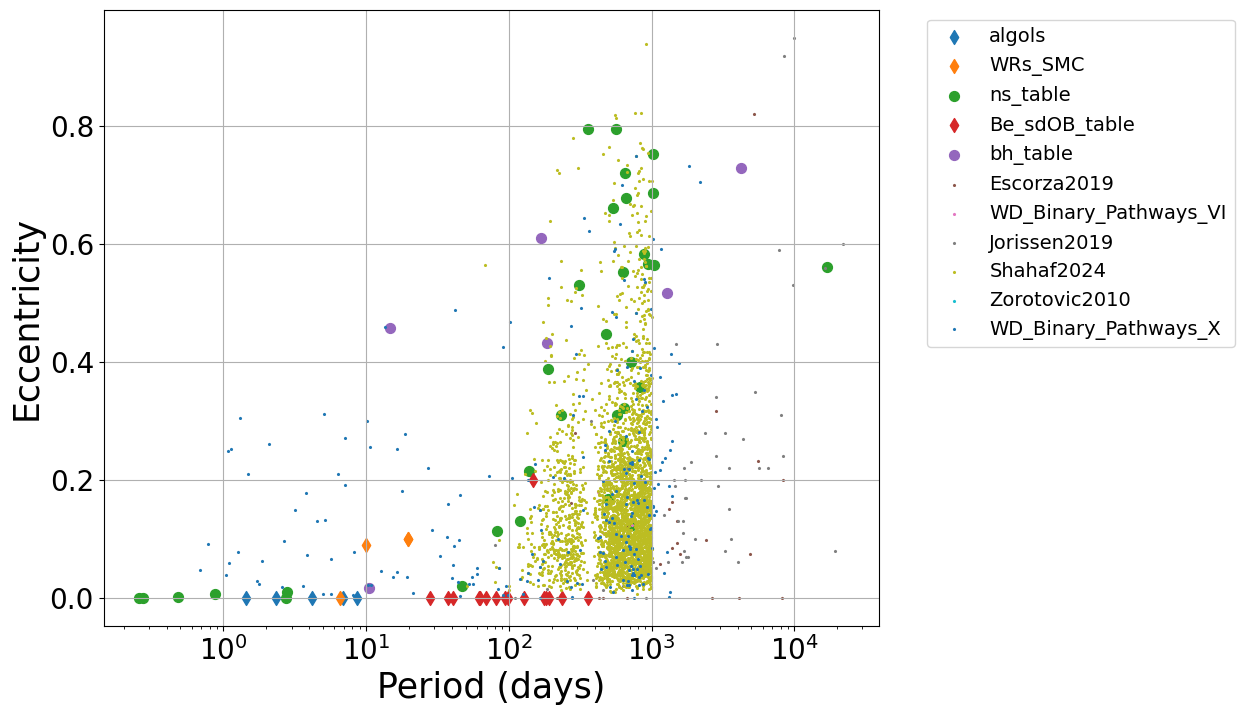

In [132]:

fig, ax = plt.subplots(figsize=(10, 8))

# Plot Period vs Eccentricity for every table
for table_name in list_of_tables:

    mark = '.'

    if table_name == 'WDMS/RebassaMansergas2012.pkl':
        continue

    if "WDMS/" in table_name:
        markersize, mark = 2, '*'
    elif "bh_" in table_name or "ns_" in table_name:
        markersize, mark = 50, 'o'
    else:
        markersize, mark = 50 , 'd'
    try:
        print(f"Table: {table_name}")
        
        # Extract mid-values [err-, value, err+]
        P = [row[1] for row in loaded_tables[table_name]['Period'] ]# if isinstance(row, (list, tuple)) and len(row) > 1]
        e = [row[1] for row in loaded_tables[table_name]['Eccentricity']] # if isinstance(row, (list, tuple)) and len(row) > 1]

        legend_label = table_name[:-4].replace('WDMS/', '')  # Clean name
        plt.scatter(P, e, marker=mark, s=markersize, label=legend_label)

    except Exception as err:
        print(f"Error processing table '{table_name}': {err}")
        continue

plt.xscale('log')
# Final plot settings
plt.xlabel('Period (days)', fontsize=25)
plt.ylabel('Eccentricity', fontsize=25)
# set tick parameters
plt.tick_params(axis='both', which='major', labelsize=20)
plt.legend(loc='upper left', fontsize=14, bbox_to_anchor=(1.05, 1.0))
plt.grid(True)

plt.savefig('../plots/Period_vs_Eccentricity.png', bbox_inches='tight')
plt.show()


Table: algols.pkl
[8.7, 6.5, 11.8, 15.6, 27.8, 13.0, 18.4, 5.4, 4.6, 3.37]
Table: WRs_SMC.pkl
Error processing table 'WRs_SMC.pkl': 'float' object is not subscriptable
Table: ns_table.pkl
Error processing table 'ns_table.pkl': 'float' object is not subscriptable
Table: Be_sdOB_table.pkl
[1.3, 0.765, 1.2, 0.865, 0.426, 1.43, 1.6, 0.53, 1.06, 1.03, 0.784, 0.477, 0.76, 1.35, 1.45, 0.27]
Table: bh_table.pkl
Error processing table 'bh_table.pkl': 'float' object is not subscriptable
Table: WDMS/Escorza2019.pkl
[np.float64(nan), np.float64(nan), np.float64(nan), np.float64(nan), np.float64(nan), np.float64(nan), np.float64(nan), np.float64(nan), np.float64(nan), np.float64(nan), np.float64(nan), np.float64(nan), np.float64(nan), np.float64(nan), np.float64(nan), np.float64(nan), np.float64(nan), np.float64(nan), np.float64(nan), np.float64(nan), np.float64(nan), np.float64(nan), np.float64(nan), np.float64(nan), np.float64(nan)]
Table: WDMS/WD_Binary_Pathways_VI.pkl
[np.float64(0.784), np.flo

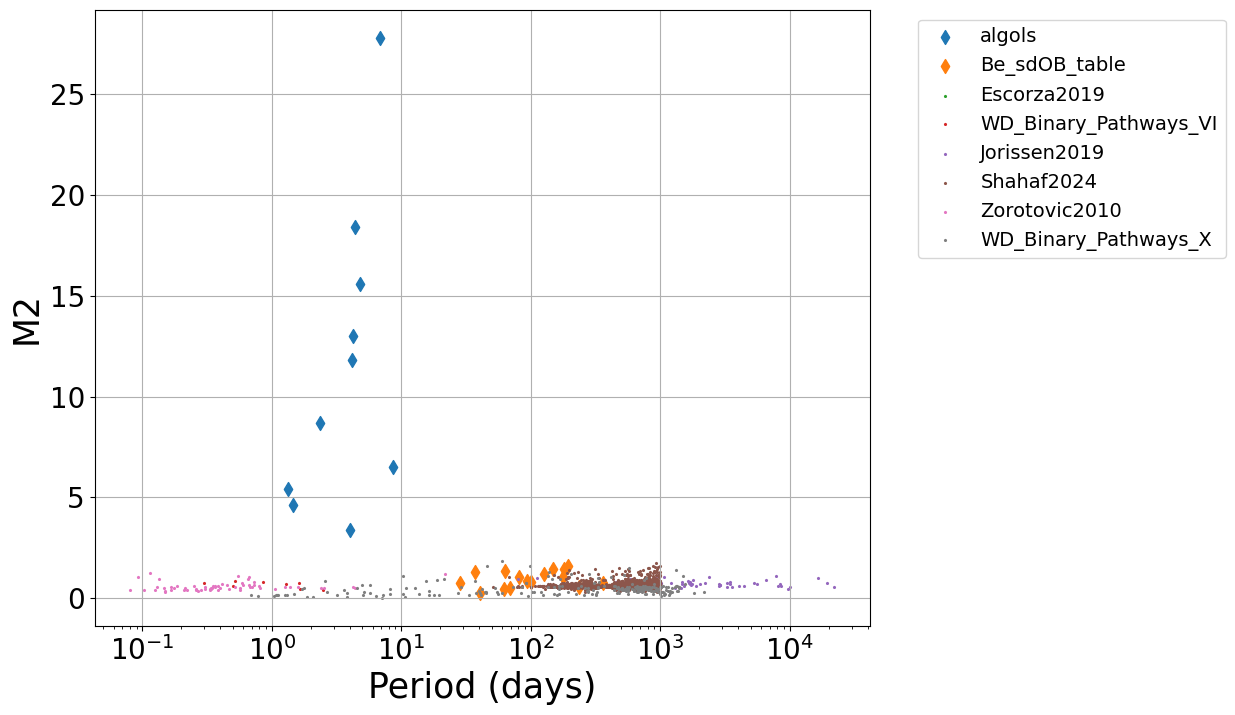

In [ ]:

fig, ax = plt.subplots(figsize=(10, 8))

# Plot Period vs Eccentricity for every table
for table_name in list_of_tables:

    mark = '.'

    if table_name == 'WDMS/RebassaMansergas2012.pkl':
        continue

    if "WDMS/" in table_name:
        markersize, mark = 2, '*'
    elif "bh_" in table_name or "ns_" in table_name:
        markersize, mark = 50, 'o'
    else:
        markersize, mark = 50 , 'd'
    try:
        print(f"Table: {table_name}")
        
        # Extract mid-values [err-, value, err+]
        P = [row[1] for row in loaded_tables[table_name]['Period'] ]# if isinstance(row, (list, tuple)) and len(row) > 1]
        M2 = [row[1] for row in loaded_tables[table_name]['M2']]

        legend_label = table_name[:-4].replace('WDMS/', '')  # Clean name
        plt.scatter(P, M2, marker=mark, s=markersize, label=legend_label)

    except Exception as err:
        print(f"Error processing table '{table_name}': {err}")
        continue

plt.xscale('log')
# Final plot settings
plt.xlabel('Period (days)', fontsize=25)
plt.ylabel('M2', fontsize=25)
# set tick parameters
plt.tick_params(axis='both', which='major', labelsize=20)
plt.legend(loc='upper left', fontsize=14, bbox_to_anchor=(1.05, 1.0))
plt.grid(True)

plt.savefig('../plots/Period_vs_M2.png', bbox_inches='tight')
plt.show()


In [102]:
P = [row[1] for row in loaded_tables['WDMS/Shahaf2024.pkl']['Period']]
print(P)
#  if isinstance(row, (list, tuple)) and len(row) > 1]
# [a[1] for a in loaded_tables['WDMS/Shahaf2024.pkl']['Period'].values]

[np.float64(930.5414829166338), np.float64(875.9230941755561), np.float64(399.28940083847755), np.float64(714.5500662316779), np.float64(481.0283080070812), np.float64(727.6437502820471), np.float64(708.6026320706101), np.float64(515.6251290754788), np.float64(465.5476431519399), np.float64(590.3441203851623), np.float64(558.4648480564705), np.float64(616.7115483263641), np.float64(829.9825394657171), np.float64(468.2264680113936), np.float64(746.5007131795677), np.float64(881.0907409867948), np.float64(677.7650555633312), np.float64(557.781130009374), np.float64(412.95044164148754), np.float64(470.05445424044655), np.float64(513.7319644676323), np.float64(882.0034086552243), np.float64(725.0975318644182), np.float64(718.7935252004758), np.float64(531.4466750425996), np.float64(489.1352165179793), np.float64(484.6256258810787), np.float64(435.87069332921897), np.float64(240.4320496250932), np.float64(933.2806973550322), np.float64(255.85601407885127), np.float64(648.2747928242486), np.

Table: algols.pkl
Table: WRs_SMC.pkl
Table: ns_table.pkl
Table: Be_sdOB_table.pkl
Table: bh_table.pkl
Table: WDMS/Escorza2019.pkl
Table: WDMS/RebassaMansergas2012.pkl


TypeError: 'value' must be an instance of str or bytes, not a float

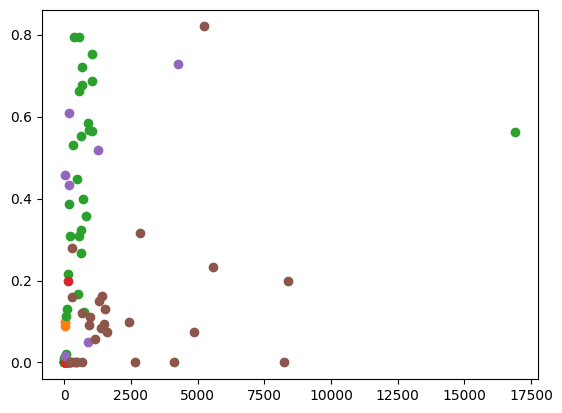

In [ ]:
# plot Period vs Eccentricity for every table
for table_name in list_of_tables:

    try: 
        print(f"Table: {table_name}")

        P = [loaded_tables[table_name]['Period'][i][1] for i in range(len(loaded_tables[table_name]['Period']))]
        e = [loaded_tables[table_name]['Eccentricity'][i][1] for i in range(len(loaded_tables[table_name]['Eccentricity']))]

    except Exception as e:
        print(f"Error processing table {table_name}") #: {e}
        continue

    legend_label = table_name[:-4].replace('WDMS/', '')  # Remove .pkl extension for label
    plt.scatter(P, e, marker='o', label=table_name[:-4])  # Remove .pkl extension for label

plt.xlabel('Period (days)')
plt.ylabel('Eccentricity')
plt.legend()
plt.show()


In [51]:
# display(Post_MT_table['Period'])

Periods = Post_MT_table['Period'].apply(lambda x: float(x[1]) )
Eccentricity = Post_MT_table['Eccentricity'].apply(lambda x: x[1])


plt.scatter(Periods, Eccentricity, alpha=0.9)
plt.xlabel('Period (days)')
plt.ylabel('Eccentricity')
plt.show()


ValueError: could not convert string to float: 'porb'

In [45]:
# Print type elements in column
for e in Eccentricity:
    if not isinstance(e, float):
        print("Eccentricity is not a float:", e)

# Print type elements in column
for p in Periods:
    if not isinstance(p, float):
        print("Period is not a float:", p)



Period is not a float: 16911
Period is not a float: 877
Period is not a float: 7.984495
Period is not a float: 17.43
Period is not a float: 11.45451
Period is not a float: 12.2181648
Period is not a float: 7.344
Period is not a float: 57.7
Period is not a float: 55.3973208
Period is not a float: 6.068669268
Period is not a float: 9.491
Period is not a float: 46.2270672
Period is not a float: 6.7313
Period is not a float: 9.17
Period is not a float: 3.00389076
Period is not a float: 9.273
Period is not a float: 22.31916
Period is not a float: 4.0202376
Period is not a float: 104.5622
Period is not a float: 3.015144
Period is not a float: 20.13369
Period is not a float: 32.81
Period is not a float: 9.9317
Period is not a float: 14.151167
Period is not a float: 33.87
Period is not a float: 3.962
Period is not a float: 4.45242576
Period is not a float: 9.936
Period is not a float: 1.97678
Period is not a float: 7.2922
Period is not a float: 38.29
Period is not a float: 19.567
Period is not